In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np

In [2]:
dataset=pd.read_csv('loan.csv')


In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\user\AppData\Local\Temp\ipykernel_7616\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


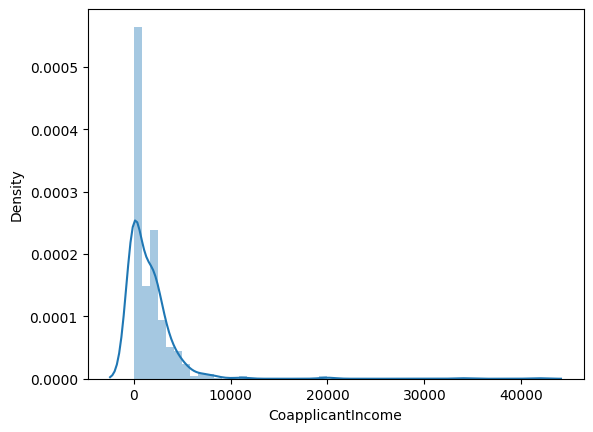

In [4]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [5]:
q1=dataset["CoapplicantIncome"].quantile(.25)
q3=dataset["CoapplicantIncome"].quantile(.75)

In [6]:
INTERQUARTILE=q3-q1

In [7]:
min_r=q1-(1.5*INTERQUARTILE)
max_r=q3+(1.5*INTERQUARTILE)

In [8]:
print(min_r,max_r)

-3445.875 5743.125


In [10]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_r]

C:\Users\user\AppData\Local\Temp\ipykernel_7616\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


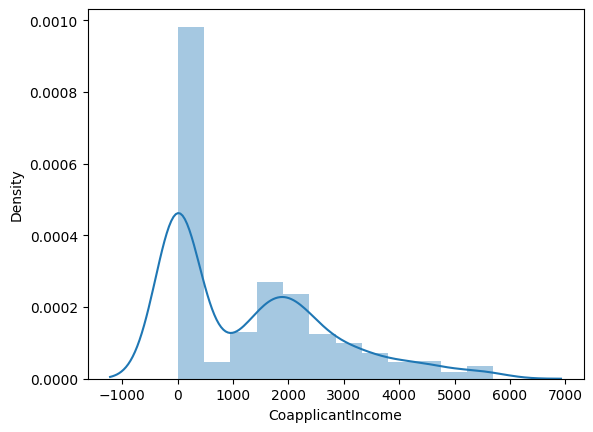

In [11]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
ft=FunctionTransformer(func=np.log1p)

In [16]:
ft.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [17]:
ft.transform(dataset[['CoapplicantIncome']])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [18]:
dataset['CoapplicantIncome_ft']=ft.transform(dataset[['CoapplicantIncome']])

C:\Users\user\AppData\Local\Temp\ipykernel_7616\1090092910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CoapplicantIncome_ft']=ft.transform(dataset[['CoapplicantIncome']])


In [19]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_7616\2755313803.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"], ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_7616\2755313803.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft"],

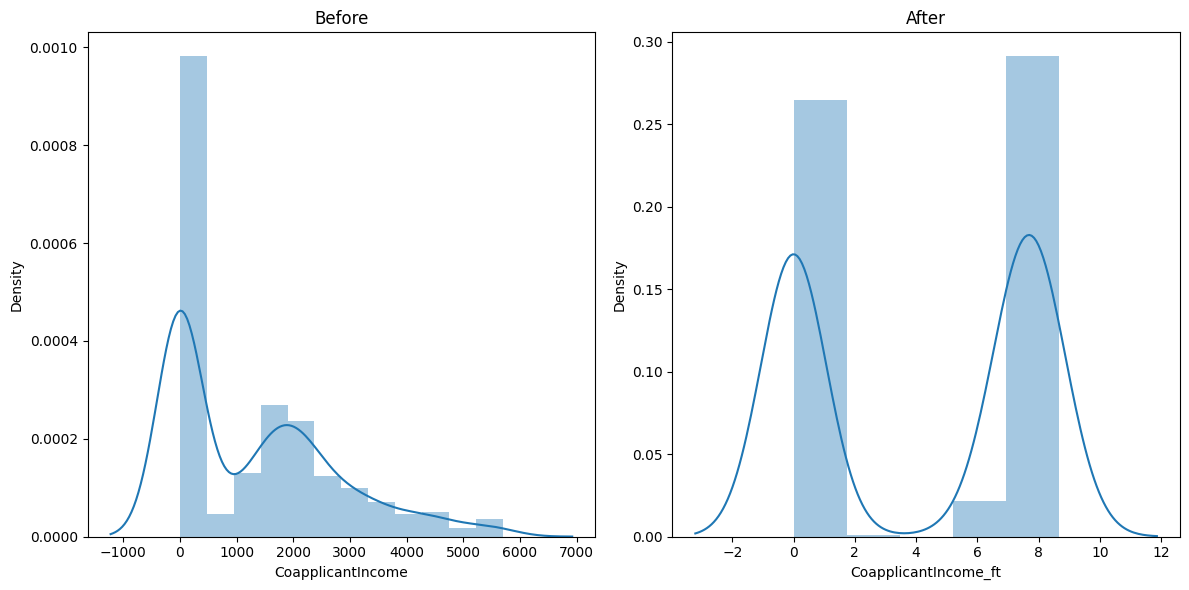

In [20]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first distribution
sns.distplot(dataset["CoapplicantIncome"], ax=axes[0])
axes[0].set_title('Before')

# Plot the second distribution
sns.distplot(dataset["CoapplicantIncome_ft"], ax=axes[1])
axes[1].set_title('After')

# Adjust the layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()

In [24]:
ft1=FunctionTransformer(func=lambda x: x**2)
ft1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_ft1"]=ft1.transform(dataset[["CoapplicantIncome"]])

C:\Users\user\AppData\Local\Temp\ipykernel_7616\108277497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["CoapplicantIncome_ft1"]=ft1.transform(dataset[["CoapplicantIncome"]])


In [25]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft,CoapplicantIncome_ft1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202,2274064.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993,5560164.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_7616\1987947476.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"], ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_7616\1987947476.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_ft1"]

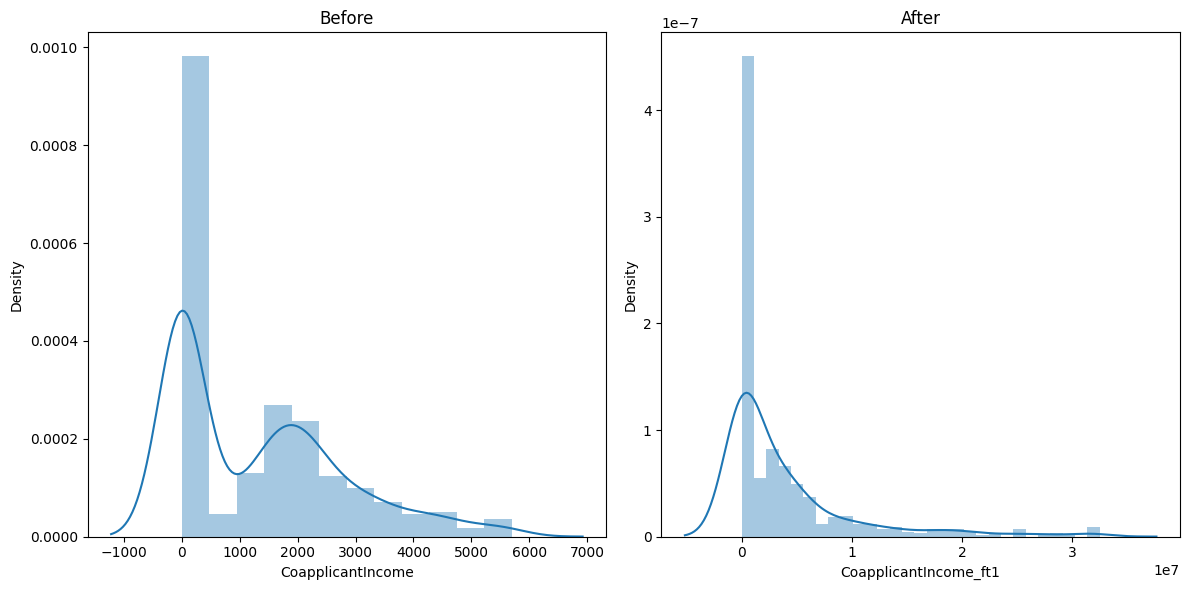

In [26]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first distribution
sns.distplot(dataset["CoapplicantIncome"], ax=axes[0])
axes[0].set_title('Before')

# Plot the second distribution
sns.distplot(dataset["CoapplicantIncome_ft1"], ax=axes[1])
axes[1].set_title('After')

# Adjust the layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()